In [ ]:
                                                Baseball Case Study

Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

In [3]:
# import important liblaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import important liblaries

In [4]:
# print top data

df=pd.read_csv(r'D:\Vishakha_eval\1\Baseball.csv')

df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


load the baseball dataset

In [5]:
pd.set_option('display.max_row',None)

In [6]:
# describe information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


we don't have missing value in dataset.we have intger and float data type data.

In [7]:
# describe statistical information

df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


all row having 30 count.and mean is near to 75% value.

In [9]:
#find row and coloumn

df.shape

(30, 17)

dataset having 30 row and 17 column.

In [12]:
#find null value in dataset

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

#there is no null value is present

In [13]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

print all the column heading

In [14]:
# find duplicate row in dataset

print(df.duplicated(keep='last'))

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool


There is no duplicate value available

In [15]:
#find the correlation

cor=df.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


there is hightest correlation betwween saves and Number of predicted wins

<AxesSubplot:>

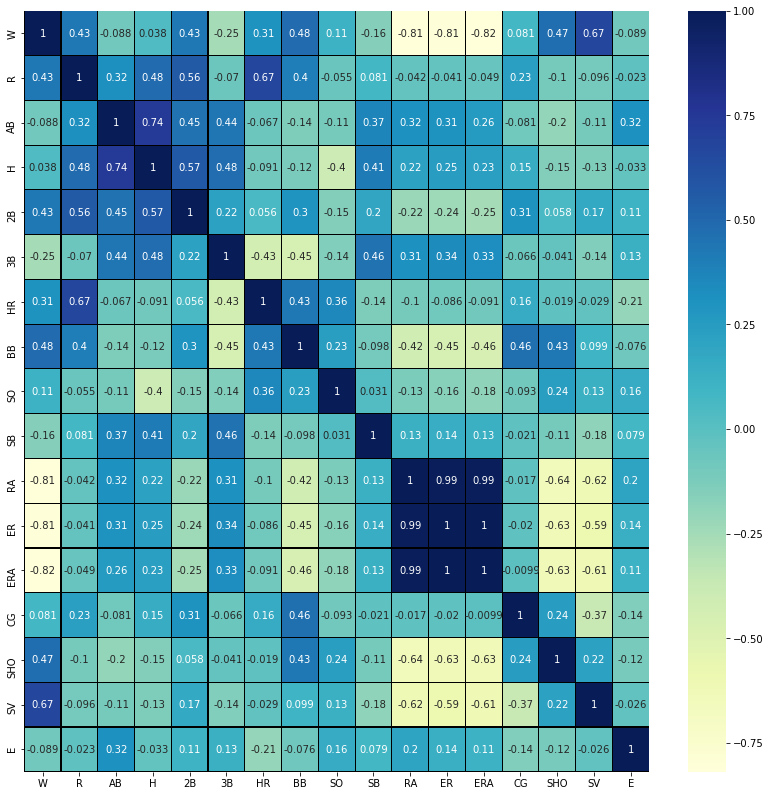

In [16]:
#prepare heat map for correlation
plt.subplots(figsize=(14,14))
sns.heatmap(cor,annot=True,linewidth=0.1,linecolor="black",cmap="YlGnBu")

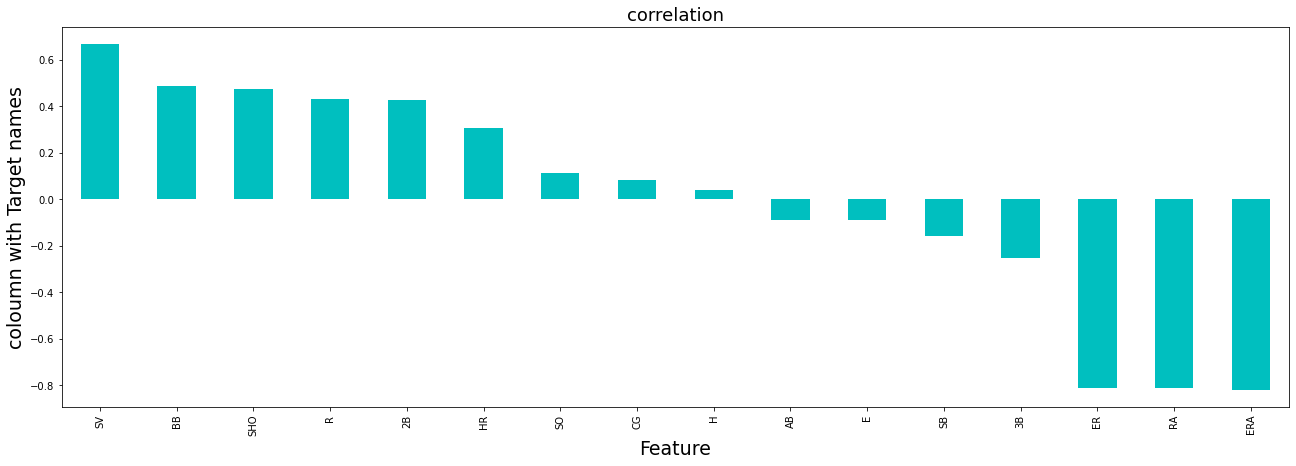

In [17]:
plt.figure(figsize=(22,7))
df.corr()["W"].sort_values(ascending=False).drop(["W"]).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=19)
plt.ylabel('coloumn with Target names',fontsize=19)
plt.title('correlation',fontsize=18)
plt.show()

saves is correlated with wins and ER,RA,ERA are inversly correlated with wins.

checking outlier

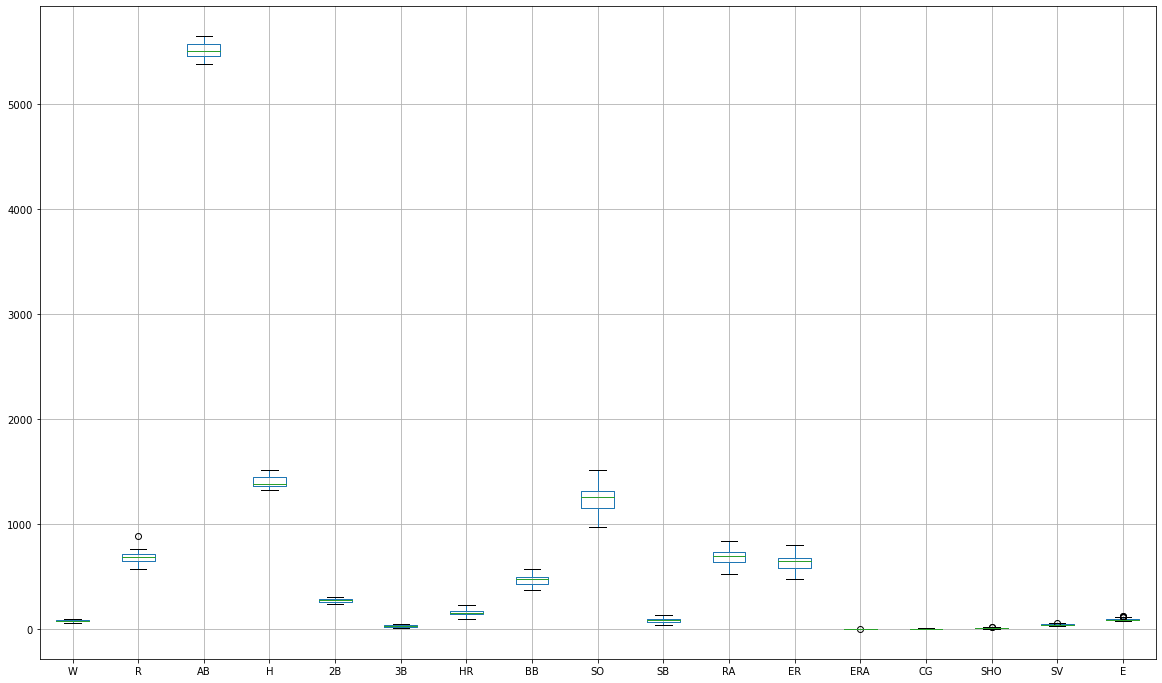

In [18]:
df.boxplot(figsize=(20,12))
plt.subplots_adjust()
plt.show()

In [19]:
df.skew() #greater than +0.5 less than -0.5

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

CG,SHO SV and E having outlier

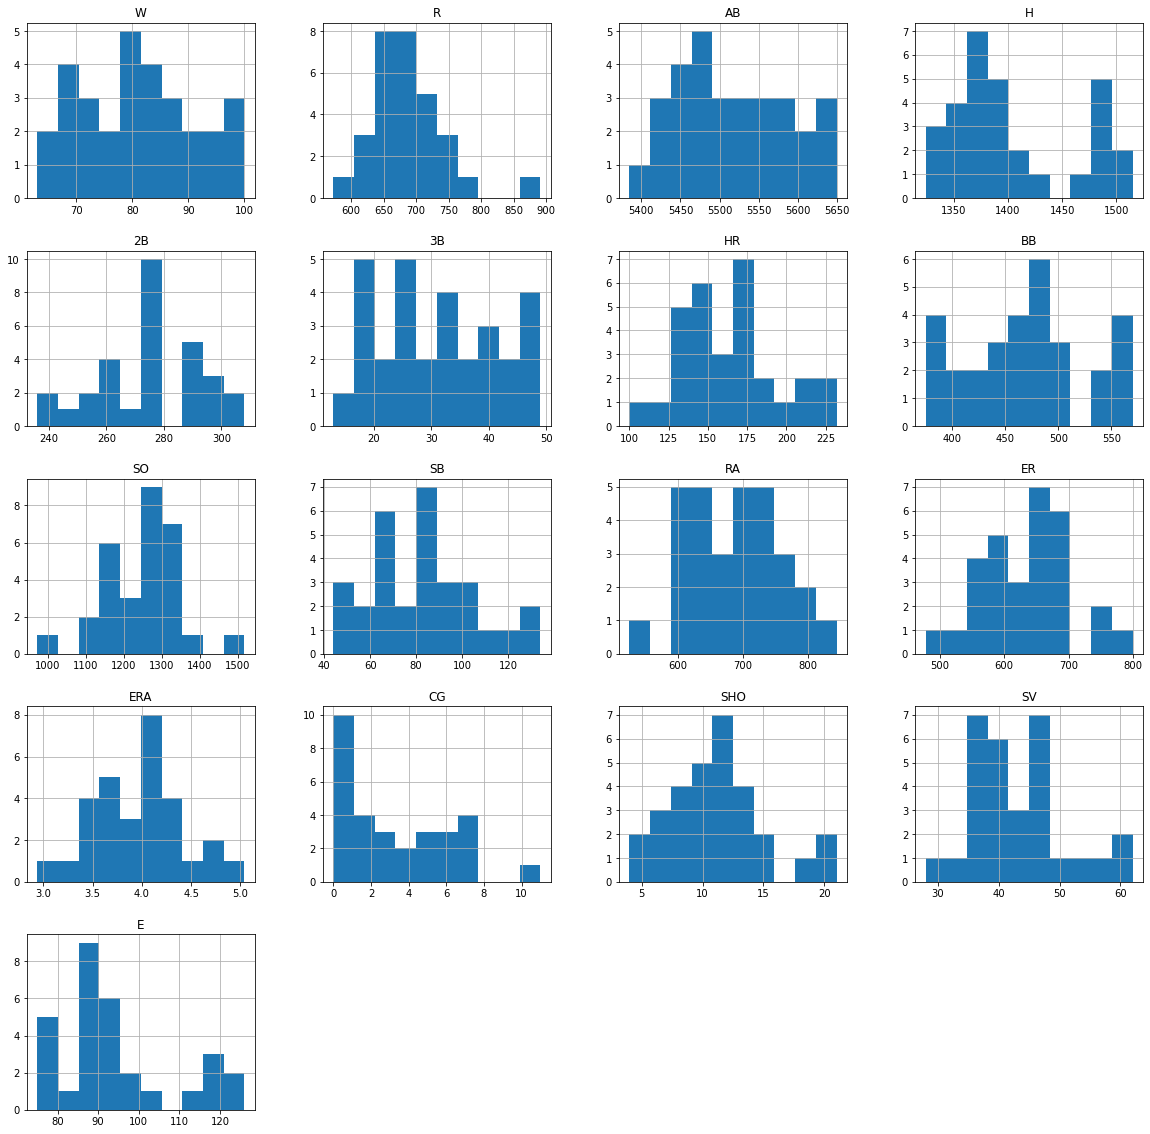

In [20]:
df.hist(figsize=(20,20))
plt.show()

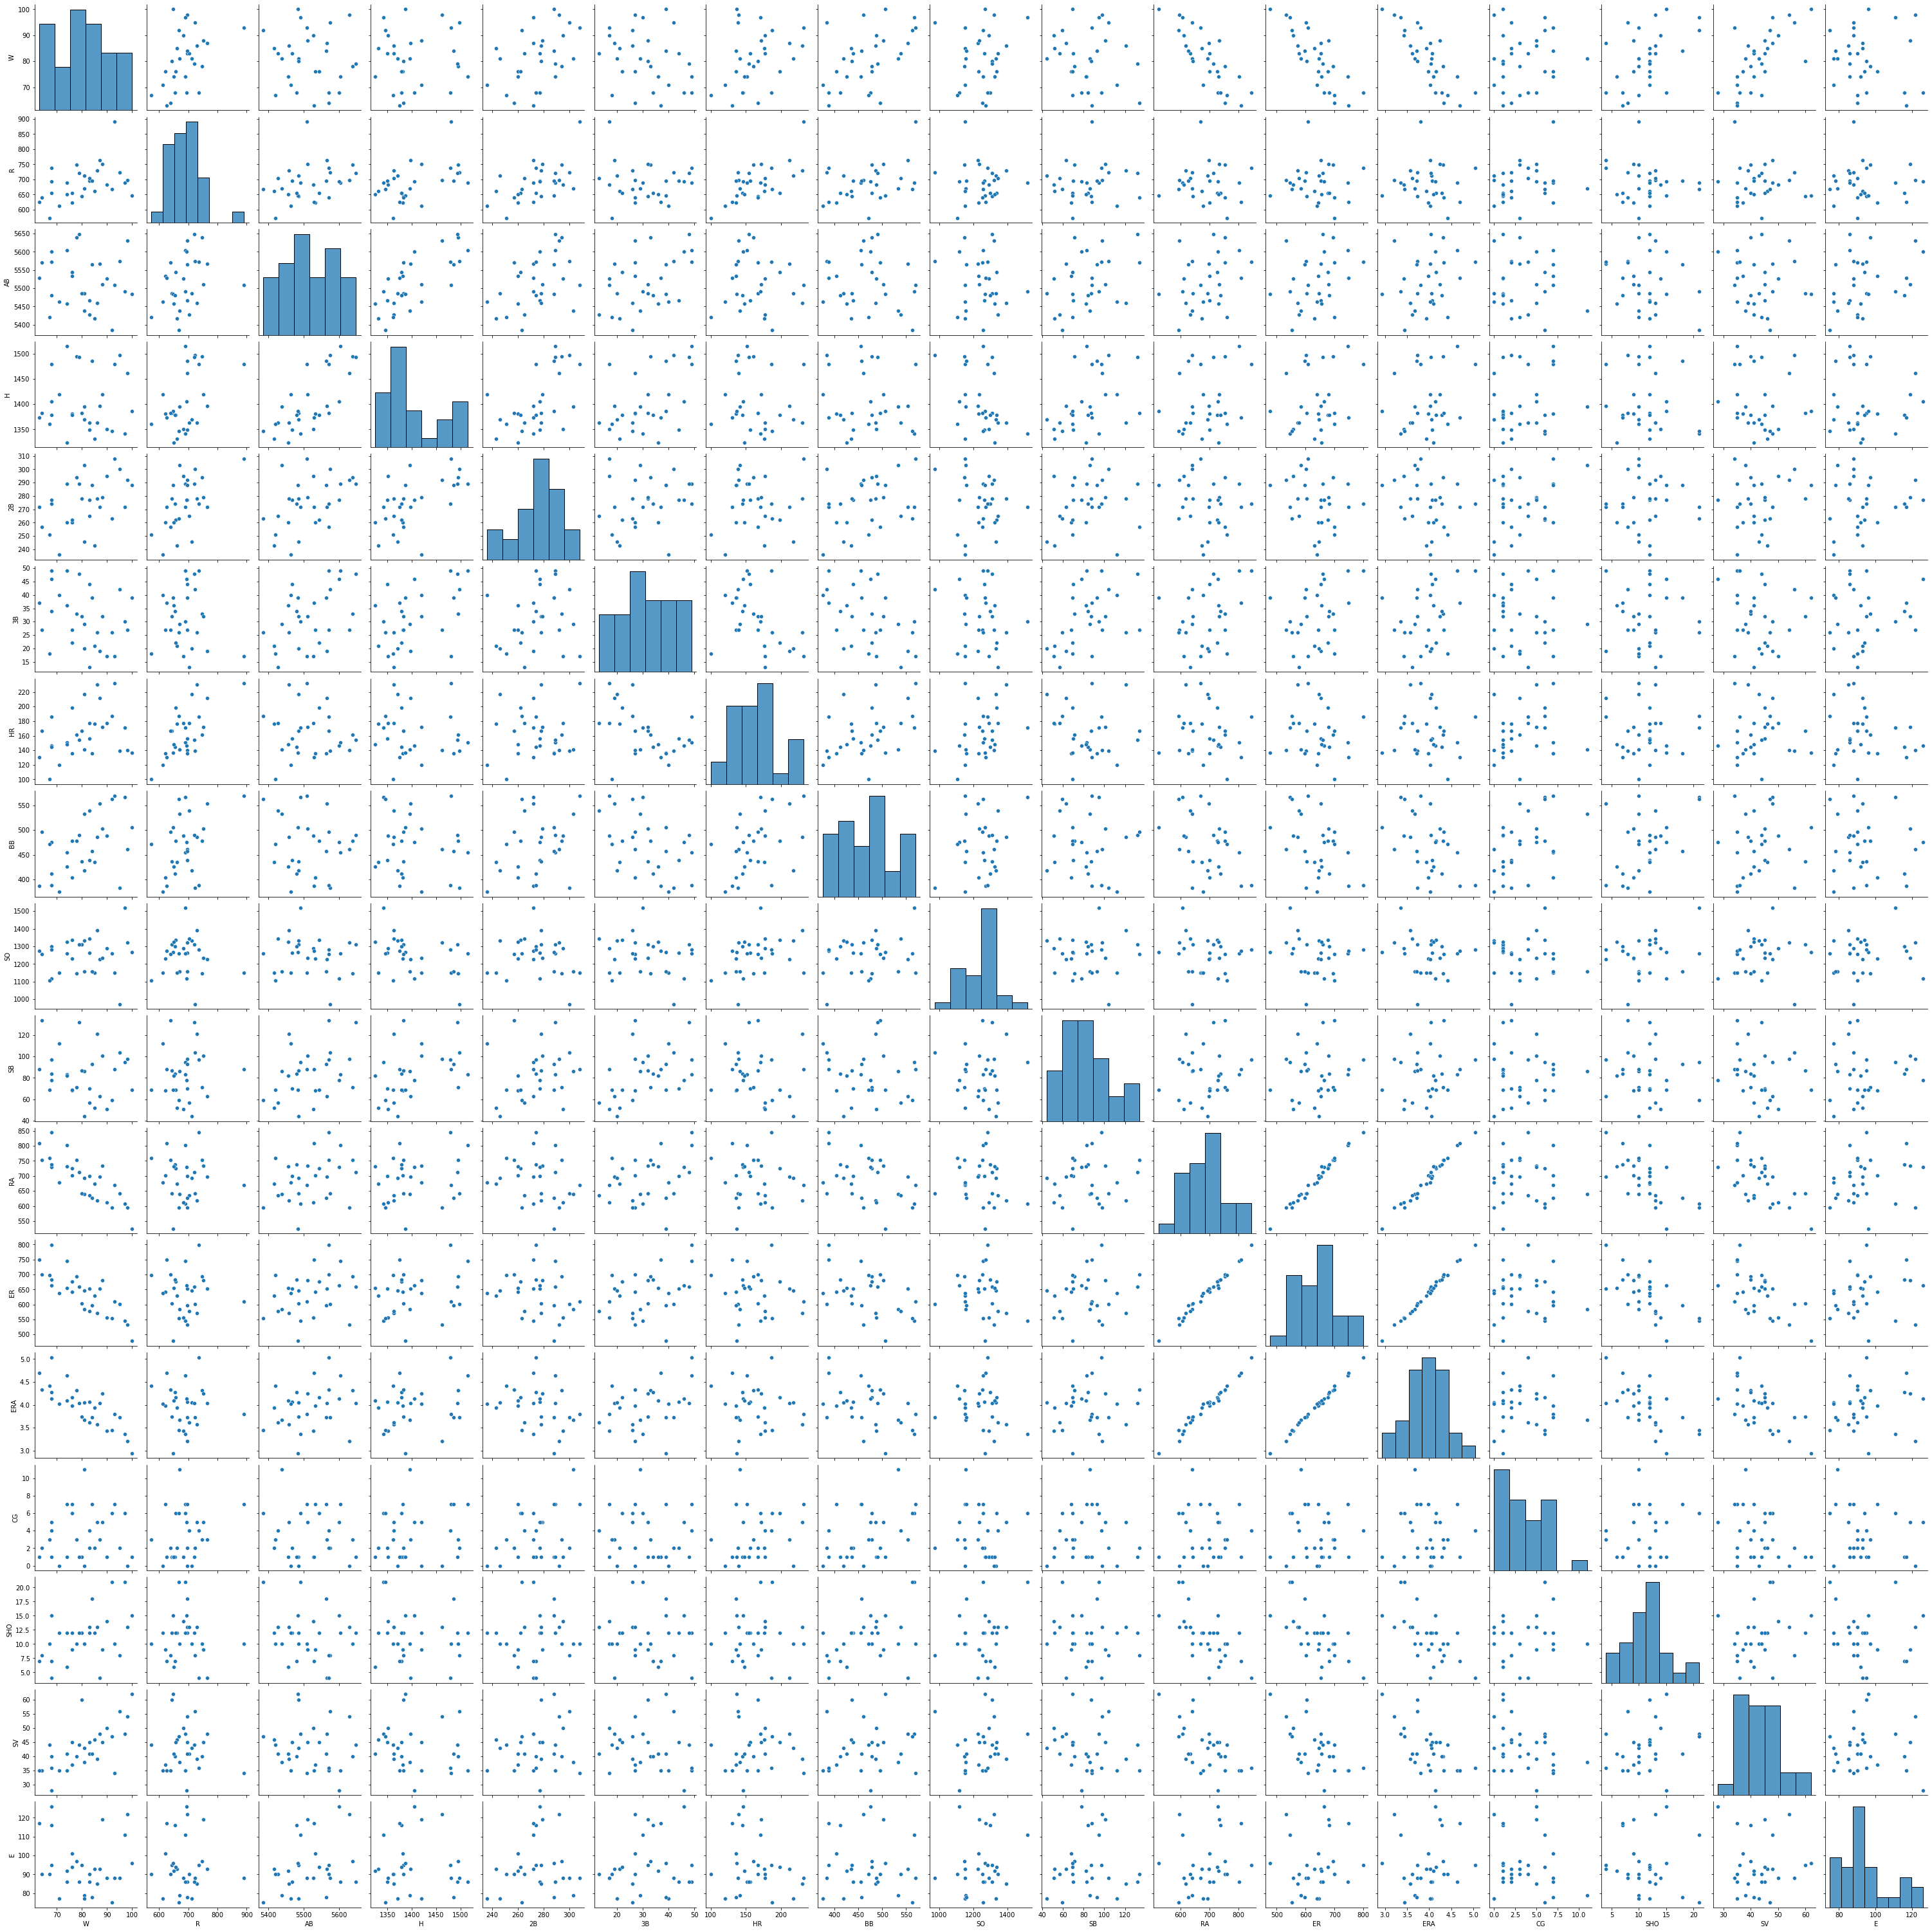

In [21]:
sns.pairplot(df)

# Encoding of Data

In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [23]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [24]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [25]:
df1=df.copy()

In [26]:
# remove the skewness

In [27]:
#applying z score method for removing skewness

In [28]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[1.36540860e+00 6.19077968e-01 8.47731264e-01 1.66368512e+00
  1.42017307e+00 1.04119304e+00 7.87298598e-01 1.53490242e+00
  2.69762957e+00 9.13883291e-01 6.66233927e-01 5.05110079e-01
  5.06955186e-01 5.39806195e-01 8.14628593e-01 1.67160651e+00
  4.61469635e-01]
 [1.97838300e-01 1.34431656e-01 7.11093535e-01 9.70680764e-01
  1.27403389e-01 1.23580856e+00 2.43966683e-01 5.36591904e-01
  1.54878442e-01 6.01825582e-01 1.65970766e-01 2.48929848e-01
  2.54597523e-01 5.39806195e-01 1.72800005e-01 2.49879323e-01
  6.07196888e-01]
 [3.24325082e-03 3.32905860e-01 1.11523330e+00 1.51891367e-01
  1.58879521e+00 2.23807850e-01 7.23377196e-01 1.13914361e+00
  8.93981893e-01 1.11449182e-01 6.80339091e-01 7.51623132e-01
  6.41346840e-01 2.77264091e+00 3.20914294e-01 6.54856158e-01
  1.11724227e+00]
 [4.83244373e-01 1.14641931e+00 2.41521620e-01 4.01088140e-01
  8.28122030e-01 4.18423371e-01 8.83180700e-01 1.16053598e+00
  1.68601848e-01 6.90984928e-01 1.80075931e-01 1.03922169e-01
  5.30100415e-02

In [29]:
treshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [30]:
df1_new=df1[(z<3).all(axis=1)]
print(df.shape)
print(df1_new.shape)

(30, 17)
(29, 17)


In [31]:
loss_percentage=((30-29)/30)*100
print("loss_percentage",loss_percentage)

loss_percentage 3.3333333333333335


Separtatring the coloumns in Feature and target:

In [38]:
X =df.drop(["W"],axis=1)
y =df['W']

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

apply standascalermethod for scale the data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
# Let's now take a look at the train dataset

X_train.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
17,689,5491,1341,272,30,171,567,1518,95,608,546,3.36,6,21,48,111
22,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77
11,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
29,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [43]:
y_train.head()

17    97
22    71
11    86
4     74
29    68
Name: W, dtype: int64

In [44]:
regression=LinearRegression()

In [45]:
regression.fit(X_train,y_train)

LinearRegression()

In [46]:
regression.score(X_train,y_train)

0.9759660735163777

In [47]:
regression.score(X_test,y_test)

-0.5670416084845928

In [48]:
y_pred = regression.predict(X_test)

In [49]:
r2_score(y_test,y_pred)

-0.5670416084845928

after evaluating the LinearRegression model.test score and r2 score is same.

In [50]:
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    regression.fit(X_train,y_train)
    pred_train=regression.predict(X_train)
    pred_test=regression.predict(X_test)
    print(f" At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f" At random state {i},the testing accuracy is :-{r2_score(y_test,pred_test)}")
    print("\n")

 At random state 0,the training accuracy is :-0.9609590618835543
 At random state 0,the testing accuracy is :-0.6629341689506705


 At random state 1,the training accuracy is :-0.9715846357165405
 At random state 1,the testing accuracy is :-0.3841724690075786


 At random state 2,the training accuracy is :-0.9898192153844548
 At random state 2,the testing accuracy is :--2.081998955010787


 At random state 3,the training accuracy is :-0.9722553885185528
 At random state 3,the testing accuracy is :-0.4618378970602377


 At random state 4,the training accuracy is :-0.964746149799658
 At random state 4,the testing accuracy is :-0.4660685292728437


 At random state 5,the training accuracy is :-0.9503092887369992
 At random state 5,the testing accuracy is :-0.7517105066858546


 At random state 6,the training accuracy is :-0.948947004521447
 At random state 6,the testing accuracy is :-0.8376419521868339


 At random state 7,the training accuracy is :-0.9631978535911326
 At random state 7,t

In [58]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(regression,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testin is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is -1.057932205834568 and accuracy score for training is 0.9531948414942486 and accuracy for the testin is 0.8804448045510347


At cross fold 3 the cv score is 0.2258846016774 and accuracy score for training is 0.9531948414942486 and accuracy for the testin is 0.8804448045510347


At cross fold 4 the cv score is 0.24952166654368527 and accuracy score for training is 0.9531948414942486 and accuracy for the testin is 0.8804448045510347


At cross fold 5 the cv score is 0.04075540667465847 and accuracy score for training is 0.9531948414942486 and accuracy for the testin is 0.8804448045510347


At cross fold 6 the cv score is 0.2515353093720216 and accuracy score for training is 0.9531948414942486 and accuracy for the testin is 0.8804448045510347


At cross fold 7 the cv score is 0.3890804644289939 and accuracy score for training is 0.9531948414942486 and accuracy for the testin is 0.8804448045510347


At cross fold 8 the cv score is 0.31937022109669355 and acc

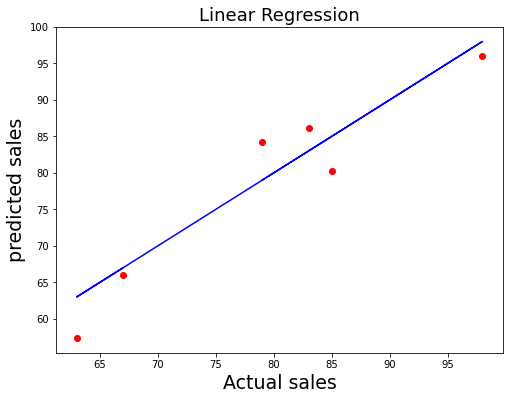

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=19)
plt.ylabel('predicted Wins',fontsize=19)
plt.title('Linear Regression',fontsize=18)
plt.show()

best fit line covering the data point which show good fit of model

Regularization:

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [54]:
from sklearn.linear_model import Lasso

parameters={'alpha' :[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [55]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)
pred_ls=ls.predict(X_test)

lss=r2_score(y_test,pred_ls)
lss

0.882093327595003

In [59]:
cv_score=cross_val_score(ls,X,y,cv=9)
cv_score=cv_score.mean()
cv_mean

-4.8090841203953385

Ensemble technique:

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [62]:
rf=RandomForestRegressor(criterion='mse',max_features="sqrt")
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred_decision=rf.predict(X_test)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=2)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)


R2 Score: 76.04123846627027
cross_val_score: -16.645574914828522


save the model in sales.pk file

In [63]:
#import bz2
import pickle
filename="Wins.pk1"
pickle.dump(rf,open(filename,'wb'))

conclusion:

In [64]:
loaded_model=pickle.load(open('Wins.pk1','rb'))
result=loaded_model.score(X_test,y_test)
print(result)

0.7604123846627027


In [65]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=["predicted","orginal"])

In [66]:
conclusion

,0,1,2,3,4,5
predicted,74.94,69.75,90.99,79.79,86.13,79.24
orginal,74.94,69.75,90.99,79.79,86.13,79.24


actual and predited wins are same